In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import pandas as pd
import netCDF4

from cartopy import config

import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker

from mpl_toolkits.axes_grid1 import ImageGrid

ERROR 1: PROJ: proj_create_from_database: Open of /opt/miniconda3/envs/prod/share/proj failed


In [3]:
figfolder = './'


In [3]:
dri = '/home/ffahrin/test/IMERG/ITCZ_states/'
fn = 'IMERG_ITCZ_st_daily_EastPac_60prc.nc' 

data_ITCZ = xr.open_dataset(dri+fn)

In [5]:
time_all = data_ITCZ['time']
time_all

<xarray.DataArray 'time' (time: 7791)>
array(['2000-06-01T00:00:00.000000000', '2000-06-02T00:00:00.000000000',
       '2000-06-03T00:00:00.000000000', ..., '2021-09-28T00:00:00.000000000',
       '2021-09-29T00:00:00.000000000', '2021-09-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
Attributes:
    standard_name:  time
    bounds:         time_bnds
    axis:           T

In [7]:
lats = -20
latn = 20.
lonw = 225 #90-135
lone = 285

mn0 = 2
mnf = 4
yr0 = 2001
yrf = 2021
time0 = str(yr0)+'-01-01T00:00:00.000000000'
timef = str(yrf)+'-12-31T00:00:00.000000000'

In [9]:
cond1_fma = (time_all['time.month'] >= mn0) & (time_all['time.month'] <= mnf) # season of interest
cond2_fma = (time_all['time.year'] <= yrf) & (time_all['time.year'] >= yr0) # season of interest
# now find only the times when MJO amplitude is in season of interest AND exceeds some threshold
time_fma = time_all.where((cond1_fma)& (cond2_fma), drop=True) 

In [10]:
itcz_state_haffke = data_ITCZ['itcz_state'].sel(time=time_fma)
itcz_state_haffke

<xarray.DataArray 'itcz_state' (time: 1874)>
[1874 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2001-02-01 2001-02-02 ... 2021-04-30
Attributes:
    long_name:  IMERG daily ITCZ state
    region:     East Pacific Ocean (90-135W)
    method:     Algorithm developed for daily averaged precipitation rate

In [11]:
# now composite average precip for specific ITCZ states
# set up conditional statements 
cond_dITCZ_haffke = (itcz_state_haffke == 1)
cond_nITCZ_haffke = (itcz_state_haffke == 2)
cond_sITCZ_haffke = (itcz_state_haffke == 3)
cond_aITCZ_haffke = (itcz_state_haffke == 4)
cond_eITCZ_haffke = (itcz_state_haffke == 5)

In [12]:
time_nITCZ = time_fma.where((cond_nITCZ_haffke), drop=True)
time_dITCZ = time_fma.where((cond_dITCZ_haffke), drop=True)
time_sITCZ = time_fma.where((cond_sITCZ_haffke), drop=True)
time_eITCZ = time_fma.where((cond_eITCZ_haffke), drop=True)
time_aITCZ = time_fma.where((cond_aITCZ_haffke), drop=True)
#time_dITCZ

In [13]:
dri = '/home/agon/Fouzia_test/equ_waves/'
fn = 'IMERG_20000601-20210930_filt_Kelvin_stdz.nc'
data_kvw = xr.open_dataset(dri+fn)

fn = 'IMERG_20000601-20210930_filt_IG0_stdz.nc'
data_ig0 = xr.open_dataset(dri+fn)

fn = 'IMERG_20000601-20210930_filt_TD-type_stdz.nc'
data_tdt = xr.open_dataset(dri+fn)

fn = 'IMERG_20000601-20210930_filt_ER_stdz.nc'
data_erw = xr.open_dataset(dri+fn)

fn = 'IMERG_20000601-20210930_filt_MRG_stdz.nc'
data_mrg = xr.open_dataset(dri+fn)

fn = 'IMERG_20000601-20210930_filt_MJO_stdz.nc'
data_mjo = xr.open_dataset(dri+fn)

fn = 'IMERG_20000601-20210930_filt_IG1_stdz.nc'
data_ig1 = xr.open_dataset(dri+fn)

In [14]:
kelvin_nITCZ= data_kvw['precipitationCal'].sel(time=time_nITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
kelvin_sITCZ= data_kvw['precipitationCal'].sel(time=time_sITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
kelvin_dITCZ= data_kvw['precipitationCal'].sel(time=time_dITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
kelvin_eITCZ= data_kvw['precipitationCal'].sel(time=time_eITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')


In [15]:
ER_nITCZ= data_erw['precipitationCal'].sel(time=time_nITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
ER_sITCZ= data_erw['precipitationCal'].sel(time=time_sITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
ER_dITCZ= data_erw['precipitationCal'].sel(time=time_dITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
ER_eITCZ= data_erw['precipitationCal'].sel(time=time_eITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')

In [16]:
MRG_nITCZ= data_mrg['precipitationCal'].sel(time=time_nITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
MRG_sITCZ= data_mrg['precipitationCal'].sel(time=time_sITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
MRG_dITCZ= data_mrg['precipitationCal'].sel(time=time_dITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
MRG_eITCZ= data_mrg['precipitationCal'].sel(time=time_eITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')

In [17]:
IG0_nITCZ= data_ig0['precipitationCal'].sel(time=time_nITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
IG0_sITCZ= data_ig0['precipitationCal'].sel(time=time_sITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
IG0_dITCZ= data_ig0['precipitationCal'].sel(time=time_dITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
IG0_eITCZ= data_ig0['precipitationCal'].sel(time=time_eITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')

In [18]:
IG1_nITCZ= data_ig1['precipitationCal'].sel(time=time_nITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
IG1_sITCZ= data_ig1['precipitationCal'].sel(time=time_sITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
IG1_dITCZ= data_ig1['precipitationCal'].sel(time=time_dITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
IG1_eITCZ= data_ig1['precipitationCal'].sel(time=time_eITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')

In [19]:
MJO_nITCZ= data_mjo['precipitationCal'].sel(time=time_nITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
MJO_sITCZ= data_mjo['precipitationCal'].sel(time=time_sITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
MJO_dITCZ= data_mjo['precipitationCal'].sel(time=time_dITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
MJO_eITCZ= data_mjo['precipitationCal'].sel(time=time_eITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')

In [20]:
TD_nITCZ= data_tdt['precipitationCal'].sel(time=time_nITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
TD_sITCZ= data_tdt['precipitationCal'].sel(time=time_sITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
TD_dITCZ= data_tdt['precipitationCal'].sel(time=time_dITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')
TD_eITCZ= data_tdt['precipitationCal'].sel(time=time_eITCZ,lat=slice(lats,latn),lon=slice(lonw,lone)).var(dim='time')

In [21]:
kelvin_var_nITCZ_avg= kelvin_nITCZ.mean(dim=('lat', 'lon'))
kelvin_var_sITCZ_avg= kelvin_sITCZ.mean(dim=('lat', 'lon'))
kelvin_var_dITCZ_avg= kelvin_dITCZ.mean(dim=('lat', 'lon'))
kelvin_var_eITCZ_avg= kelvin_eITCZ.mean(dim=('lat', 'lon'))

In [22]:
ER_var_nITCZ_avg= ER_nITCZ.mean(dim=('lat', 'lon'))
ER_var_sITCZ_avg= ER_sITCZ.mean(dim=('lat', 'lon'))
ER_var_dITCZ_avg= ER_dITCZ.mean(dim=('lat', 'lon'))
ER_var_eITCZ_avg= ER_eITCZ.mean(dim=('lat', 'lon'))

In [23]:
MRG_var_nITCZ_avg= MRG_nITCZ.mean(dim=('lat', 'lon'))
MRG_var_sITCZ_avg= MRG_sITCZ.mean(dim=('lat', 'lon'))
MRG_var_dITCZ_avg= MRG_dITCZ.mean(dim=('lat', 'lon'))
MRG_var_eITCZ_avg= MRG_eITCZ.mean(dim=('lat', 'lon'))

In [24]:
IG0_var_nITCZ_avg= IG0_nITCZ.mean(dim=('lat', 'lon'))
IG0_var_sITCZ_avg= IG0_sITCZ.mean(dim=('lat', 'lon'))
IG0_var_dITCZ_avg= IG0_dITCZ.mean(dim=('lat', 'lon'))
IG0_var_eITCZ_avg= IG0_eITCZ.mean(dim=('lat', 'lon'))

In [25]:
IG1_var_nITCZ_avg= IG1_nITCZ.mean(dim=('lat', 'lon'))
IG1_var_sITCZ_avg= IG1_sITCZ.mean(dim=('lat', 'lon'))
IG1_var_dITCZ_avg= IG1_dITCZ.mean(dim=('lat', 'lon'))
IG1_var_eITCZ_avg= IG1_eITCZ.mean(dim=('lat', 'lon'))

In [26]:
MJO_var_nITCZ_avg= MJO_nITCZ.mean(dim=('lat', 'lon'))
MJO_var_sITCZ_avg= MJO_sITCZ.mean(dim=('lat', 'lon'))
MJO_var_dITCZ_avg= MJO_dITCZ.mean(dim=('lat', 'lon'))
MJO_var_eITCZ_avg= MJO_eITCZ.mean(dim=('lat', 'lon'))

In [27]:
TD_var_nITCZ_avg= TD_nITCZ.mean(dim=('lat', 'lon'))
TD_var_sITCZ_avg= TD_sITCZ.mean(dim=('lat', 'lon'))
TD_var_dITCZ_avg= TD_dITCZ.mean(dim=('lat', 'lon'))
TD_var_eITCZ_avg= TD_eITCZ.mean(dim=('lat', 'lon'))

In [28]:
var_kelvin_nITCZ= (kelvin_var_nITCZ_avg)*100
var_kelvin_sITCZ= (kelvin_var_sITCZ_avg)*100
var_kelvin_dITCZ= (kelvin_var_dITCZ_avg)*100
var_kelvin_eITCZ= (kelvin_var_eITCZ_avg)*100

In [29]:
var_ER_nITCZ= (ER_var_nITCZ_avg)*100
var_ER_sITCZ= (ER_var_sITCZ_avg)*100
var_ER_dITCZ= (ER_var_dITCZ_avg)*100
var_ER_eITCZ= (ER_var_eITCZ_avg)*100

In [30]:
var_MRG_nITCZ= (MRG_var_nITCZ_avg)*100
var_MRG_sITCZ= (MRG_var_sITCZ_avg)*100
var_MRG_dITCZ= (MRG_var_dITCZ_avg)*100
var_MRG_eITCZ= (MRG_var_eITCZ_avg)*100

In [31]:
var_IG0_nITCZ= (IG0_var_nITCZ_avg)*100
var_IG0_sITCZ= (IG0_var_sITCZ_avg)*100
var_IG0_dITCZ= (IG0_var_dITCZ_avg)*100
var_IG0_eITCZ= (IG0_var_eITCZ_avg)*100

In [32]:
var_IG1_nITCZ= (IG1_var_nITCZ_avg)*100
var_IG1_sITCZ= (IG1_var_sITCZ_avg)*100
var_IG1_dITCZ= (IG1_var_dITCZ_avg)*100
var_IG1_eITCZ= (IG1_var_eITCZ_avg)*100

In [33]:
var_MJO_nITCZ= (MJO_var_nITCZ_avg)*100
var_MJO_sITCZ= (MJO_var_sITCZ_avg)*100
var_MJO_dITCZ= (MJO_var_dITCZ_avg)*100
var_MJO_eITCZ= (MJO_var_eITCZ_avg)*100

In [34]:
var_TD_nITCZ= (TD_var_nITCZ_avg)*100
var_TD_sITCZ= (TD_var_sITCZ_avg)*100
var_TD_dITCZ= (TD_var_dITCZ_avg)*100
var_TD_eITCZ= (TD_var_eITCZ_avg)*100

In [36]:
kelvin_fma = data_kvw['precipitationCal'].sel(lat=slice(lats,latn),lon=slice(lonw,lone), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
ER_fma = data_erw['precipitationCal'].sel(lat=slice(lats,latn),lon=slice(lonw,lone), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
MRG_fma = data_mrg['precipitationCal'].sel(lat=slice(lats,latn),lon=slice(lonw,lone), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
IG0_fma = data_ig0['precipitationCal'].sel(lat=slice(lats,latn),lon=slice(lonw,lone), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
IG1_fma = data_ig1['precipitationCal'].sel(lat=slice(lats,latn),lon=slice(lonw,lone), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
MJO_fma = data_mjo['precipitationCal'].sel(lat=slice(lats,latn),lon=slice(lonw,lone), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))
TD_fma = data_tdt['precipitationCal'].sel(lat=slice(lats,latn),lon=slice(lonw,lone), time=time_fma).var(dim=('time')).mean(dim=('lat','lon'))

In [37]:
pr_kelvin = (kelvin_fma)*100
pr_ER = (ER_fma)*100
pr_MRG = (MRG_fma)*100
pr_IG0 = (IG0_fma)*100
pr_IG1 = (IG1_fma)*100
pr_MJO = (MJO_fma)*100
pr_TD = (TD_fma)*100

In [38]:
nITCZ_prc = np.array([var_kelvin_nITCZ.values,var_IG0_nITCZ.values,var_TD_nITCZ.values,var_ER_nITCZ.values,var_MRG_nITCZ.values,var_MJO_nITCZ.values,var_IG1_nITCZ.values])
sITCZ_prc = np.array([var_kelvin_sITCZ.values,var_IG0_sITCZ.values,var_TD_sITCZ.values,var_ER_sITCZ.values,var_MRG_sITCZ.values,var_MJO_sITCZ.values,var_IG1_sITCZ.values])
dITCZ_prc = np.array([var_kelvin_dITCZ.values,var_IG0_dITCZ.values,var_TD_dITCZ.values,var_ER_dITCZ.values,var_MRG_dITCZ.values,var_MJO_dITCZ.values,var_IG1_dITCZ.values])
eITCZ_prc = np.array([var_kelvin_eITCZ.values,var_IG0_eITCZ.values,var_TD_eITCZ.values,var_ER_eITCZ.values,var_MRG_eITCZ.values,var_MJO_eITCZ.values,var_IG1_eITCZ.values])
total_prc= np.array([pr_kelvin.values,pr_IG0.values,pr_TD.values,pr_ER.values,pr_MRG.values,pr_MJO.values,pr_IG1.values])

In [39]:
data_prc = [list(nITCZ_prc.flatten()),
list(sITCZ_prc.flatten()),
list(dITCZ_prc.flatten()),list(eITCZ_prc.flatten()), list(total_prc.flatten())]

In [40]:
itcz = ['nITCZ ('+str(np.round(sum(nITCZ_prc), decimals=1))+'%)', 'sITCZ ('+str(np.round(sum(sITCZ_prc), decimals=1))+'%)','dITCZ ('+str(np.round(sum(dITCZ_prc), decimals=1))+'%)', 'eITCZ ('+str(np.round(sum(eITCZ_prc), decimals=1))+'%)']
kelvin_itcz= np.array([var_kelvin_nITCZ.values,var_kelvin_sITCZ.values,var_kelvin_dITCZ.values,var_kelvin_eITCZ.values])#,per_kelvin.values])
IG0_itcz = np.array([var_IG0_nITCZ.values,var_IG0_sITCZ.values,var_IG0_dITCZ.values,var_IG0_eITCZ.values])#,per_IG0.values])
TD_itcz = np.array([var_TD_nITCZ.values,var_TD_sITCZ.values,var_TD_dITCZ.values,var_TD_eITCZ.values])#,per_TD.values])
MRG_itcz = np.array([var_MRG_nITCZ.values,var_MRG_sITCZ.values,var_MRG_dITCZ.values,var_MRG_eITCZ.values])
MJO_itcz = np.array([var_MJO_nITCZ.values,var_MJO_sITCZ.values,var_MJO_dITCZ.values,var_MJO_eITCZ.values])
IG1_itczc = np.array([var_IG1_nITCZ.values,var_IG1_sITCZ.values,var_IG1_dITCZ.values,var_IG1_eITCZ.values])
ER_itcz = np.array([var_ER_nITCZ.values,var_ER_sITCZ.values,var_ER_dITCZ.values,var_ER_eITCZ.values])


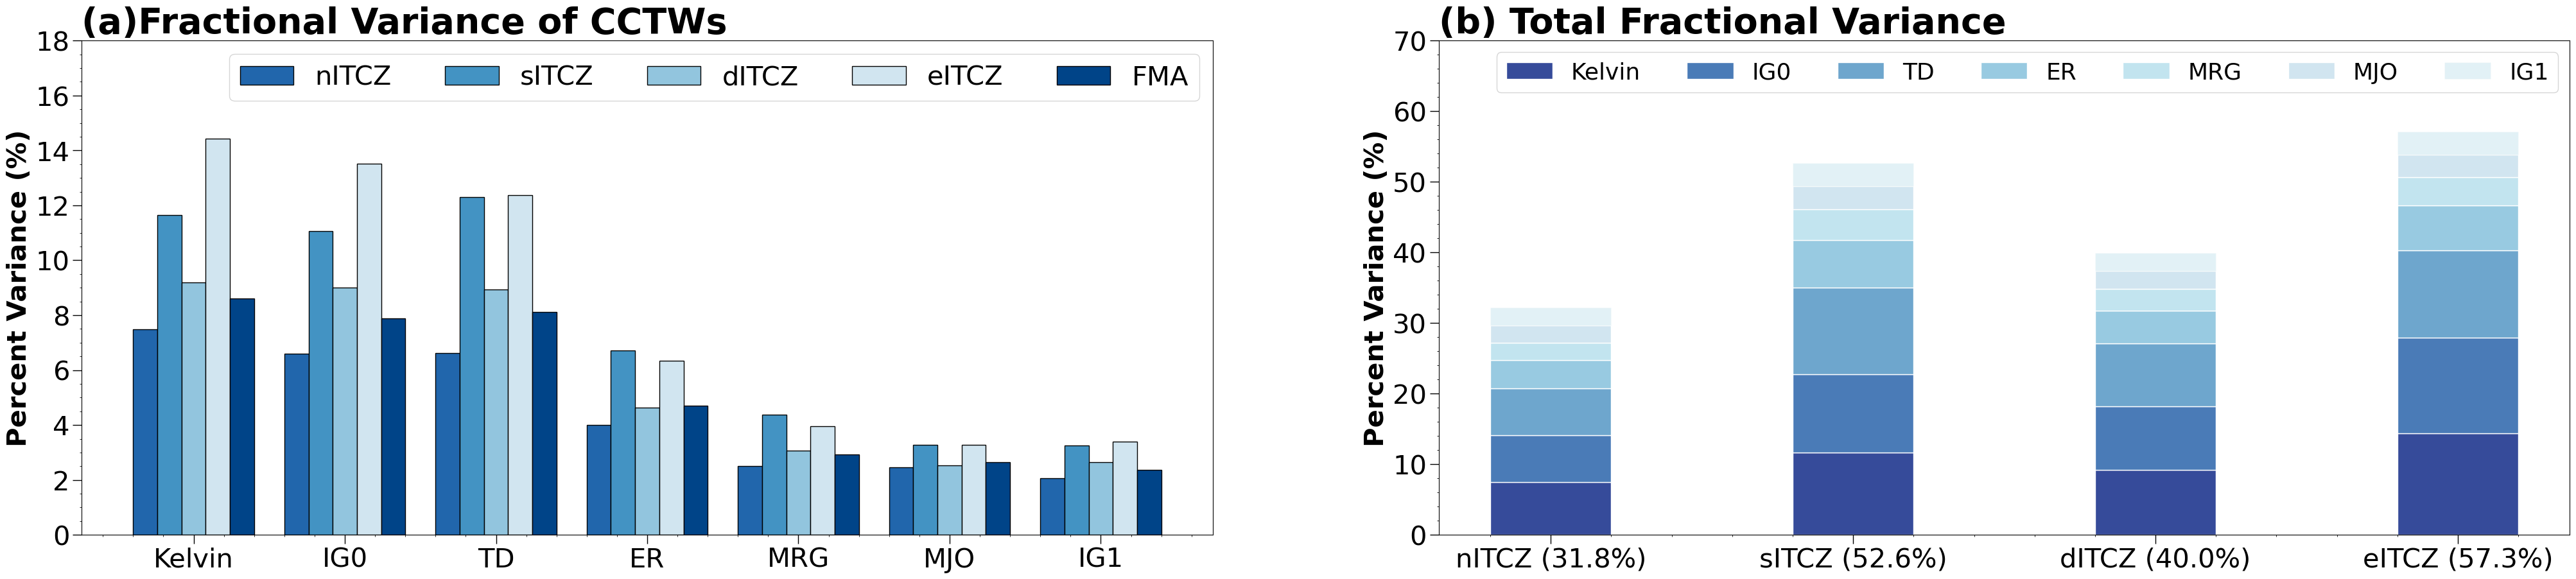

In [42]:
npan = 2
wid=.16
w=0.4
fs=30
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(50,10))#, tight_layout='true')
for j in range(0,npan,1):
    ax1 = fig.add_subplot(1,npan,j+1)
    plt.minorticks_on()
    ax1.tick_params(axis='both', which='major', length=10, width=1, direction='out', labelsize=fs)
    ax1.tick_params(axis='x', labelsize=fs)
    ax1.tick_params(axis='y', labelsize=fs)
    if j == 0:
        X=['Kelvin', 'IG0','TD', 'ER','MRG','MJO','IG1'] #,'Total Variance']
        X_axis = np.arange(len(X))
        #color=['#364B9A', '#4A7BB7','#6EA6CD','#98CAE1','#C2E4EF','#D1E5F0','lightblue']
        color =['#2166AC', '#4393C3', '#92C5DE', '#D1E5F0','#004488']
        #color = ["#FFFFFF","#DDAA33", "#004488", "#000000"]
        plt0= plt.bar(X_axis, data_prc[0], color = color[0],label='nITCZ',width = wid,edgecolor= "k")
        plt1= plt.bar(X_axis+wid, data_prc[1], color = color[1], width = wid,edgecolor= "k",label='sITCZ')
        plt2= plt.bar(X_axis+(wid*2), data_prc[2], color = color[2], width = wid,edgecolor= "k",label='dITCZ')
        plt3= plt.bar(X_axis+(wid*3), data_prc[3], color = color[3], width = wid,edgecolor= "k",label='eITCZ')
        plt4= plt.bar(X_axis+(wid*4), data_prc[4], color = color[4], width = wid,edgecolor= "k",label='FMA')
        #plt5= plt.bar(X_axis+(wid*5), data[5], color = color[5], width = wid,edgecolor= "k",label='MJO')
        #plt6= plt.bar(X_axis+(wid*6), data[6], color = color[6], width = wid,edgecolor= "k",label='IG1',alpha=0.35)
        #plt.xticks(((X_axis+wid)+(X_axis+(wid*2)))/2, X)
        plt.xticks((X_axis+(wid*2)), X)

        plt.yticks(np.arange(0, 20, 2),rotation=0, fontsize=fs)
        plt.legend(loc="upper right", fontsize =fs,ncol=7)
        plt.ylabel("Percent Variance (%)",fontsize=fs,fontweight="bold")
        plt.title('(a)Fractional Variance of CCTWs',loc="left",fontsize=40,fontweight="bold")
    elif j == 1:
        plt5= plt.bar(itcz, kelvin_itcz, color ='#364B9A',edgecolor= "w",width = w , label='Kelvin')
        plt6= plt.bar(itcz, IG0_itcz,bottom = kelvin_itcz, color= '#4A7BB7',edgecolor= "w", width=w, label='IG0')
        plt7= plt.bar(itcz, TD_itcz,bottom = kelvin_itcz+IG0_itcz, color= '#6EA6CD',edgecolor= "w", width=w,label='TD')
        plt8= plt.bar(itcz, ER_itcz, bottom = kelvin_itcz+IG0_itcz+TD_itcz, color= '#98CAE1',edgecolor= "w" ,width = w,label='ER' )
        plt9= plt.bar(itcz, MRG_itcz,bottom = kelvin_itcz+IG0_itcz+TD_itcz+ER_itcz, color= '#C2E4EF',edgecolor= "w", width=w,label='MRG' )
        plt10= plt.bar(itcz, MJO_itcz,bottom = kelvin_itcz+IG0_itcz+TD_itcz+ER_itcz+MRG_itcz, color= '#D1E5F0',edgecolor= "w", width=w,label='MJO')
        plt11= plt.bar(itcz, MJO_itcz,bottom = kelvin_itcz+IG0_itcz+TD_itcz+ER_itcz+MRG_itcz+MJO_itcz, color= 'lightblue',edgecolor= "w", width=w,label='IG1', alpha=0.35 )
        plt.yticks(np.arange(0, 80, 10),fontsize=fs)
        plt.xticks(fontsize=fs)
        plt.title('(b) Total Fractional Variance',loc="left",fontsize=40,fontweight="bold")
        #plt.legend(loc="upper left", fontsize =10,ncol=len(plotdata.columns))
        #plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
        plt.ylabel("Percent Variance (%)",fontsize=fs, fontweight="bold")
        plt.legend( loc="upper right", ncol=7,fontsize=26)
        plt.minorticks_on()
#plt.savefig(figfolder+'New_IMERG_ITCZ_wave_var.pdf' ,bbox_inches="tight",transparent=False)              